<a href="https://colab.research.google.com/github/AhtashamAkram/DataSet/blob/main/ProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-class Classification with "PyCaret"

In [1]:

!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 301 kB 4.6 MB/s 
     |████████████████████████████████| 1.7 MB 12.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 24.3 MB/s 
     |████████████████████████████████| 5.0 MB 46.7 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 662 kB 61.7 MB/s 
     |████████████████████████████████| 141 kB 65.1 MB/s 
     |████████████████████████████████| 2.0 MB 49.5 MB/s 
     |████████████████████████████████| 325 kB 69.2 MB/s 
     |████████████████████████████████| 6.8 MB 54.3 MB/s 
     |████████████████████████████████| 88 kB 8.2 MB/s 
     |████████████████████████████████| 167 kB 55.8 MB/s 
     |████████████████████████████████| 2

In [2]:
from pycaret.utils import version
version()

'2.3.6'

**Import** **Libraries**

In [3]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (9,7)

import seaborn as sns; 
sns.set_theme(style="darkgrid")

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This dataset aims to classify stars based on their spectral characteristics.

To construct the data following six features were used:

***Attribute Information:***

To construct the data, six features of stars were measured:

**•	Temperature:** This attribute will return the temperature of a star.

**•	Luminosity:** Luminosity is found out by light of star.

**•	Radius:** From a star's luminosity and surface temperature, radius can be calculated.

**•	Absolute Magnitude:** The absolute magnitude is a standard distance of star from the Earth

**•	Star type:** Returns the type of star according to the spectral class 

**•	Star Class:** Star class could be O, F and M.


In [5]:
# Read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/AhtashamAkram/DataSet/main/Star_Data_3%20class_Updatedcsv.csv')
df.head(30)

Temperature (F)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0              3068          0.002400       0.17000                  16.120   
1              3042          0.000500       0.15420                  16.600   
2              2600          0.000300       0.10200                  18.700   
3              2800          0.000200       0.16000                  16.650   
4              1939          0.000138       0.10300                  20.060   
5              2840          0.000650       0.11000                  16.980   
6              2637          0.000730       0.12700                  17.220   
7              2600          0.000400       0.09600                  17.400   
8              2650          0.000690       0.11000                  17.450   
9              2700          0.000180       0.13000                  16.050   
10             3600          0.002900       0.51000                  10.690   
11             3129          0.012200       0.37610                  11.790   
12             3134          0.000400       0.19600                  13.210   
13             3628          0.005500       0.39300                  10.480   
14             2650          0.000600       0.14000                  11.782   
15             3340          0.003800       0.24000                  13.070   
16             2799          0.001800       0.16000                  14.790   
17             3692          0.003670       0.47000                  10.800   
18             3192          0.003620       0.19670                  13.530   
19             3441          0.039000       0.35100                  11.180   
20            25000          0.056000       0.00840                  10.580   
21             7740          0.000490       0.01234                  14.020   
22             7220          0.000170       0.01100                  14.230   
23             8500          0.000500       0.01000                  14.500   
24            16500          0.013000       0.01400                  11.890   
25            12990          0.000085       0.00984                  12.230   
26             8570          0.000810       0.00970                  14.200   
27             7700          0.000110       0.01280                  14.470   
28            11790          0.000150       0.01100                  12.590   
29             7230          0.000080       0.01300                  14.080   

    Star type Spectral Class  
0           0              M  
1           0              M  
2           0              M  
3           0              M  
4           0              M  
5           0              M  
6           0              M  
7           0              M  
8           0              M  
9           0              M  
10          1              M  
11          1              M  
12          1              M  
13          1              M  
14          1              M  
15          1              M  
16          1              M  
17          1              M  
18          1              M  
19          1              M  
20          2              O  
21          2              F  
22          2              F  
23          2              F  
24          2              O  
25          2              F  
26          2              F  
27          2              F  
28          2              F  
29          2              F

In [6]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [7]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data** **Analysis**

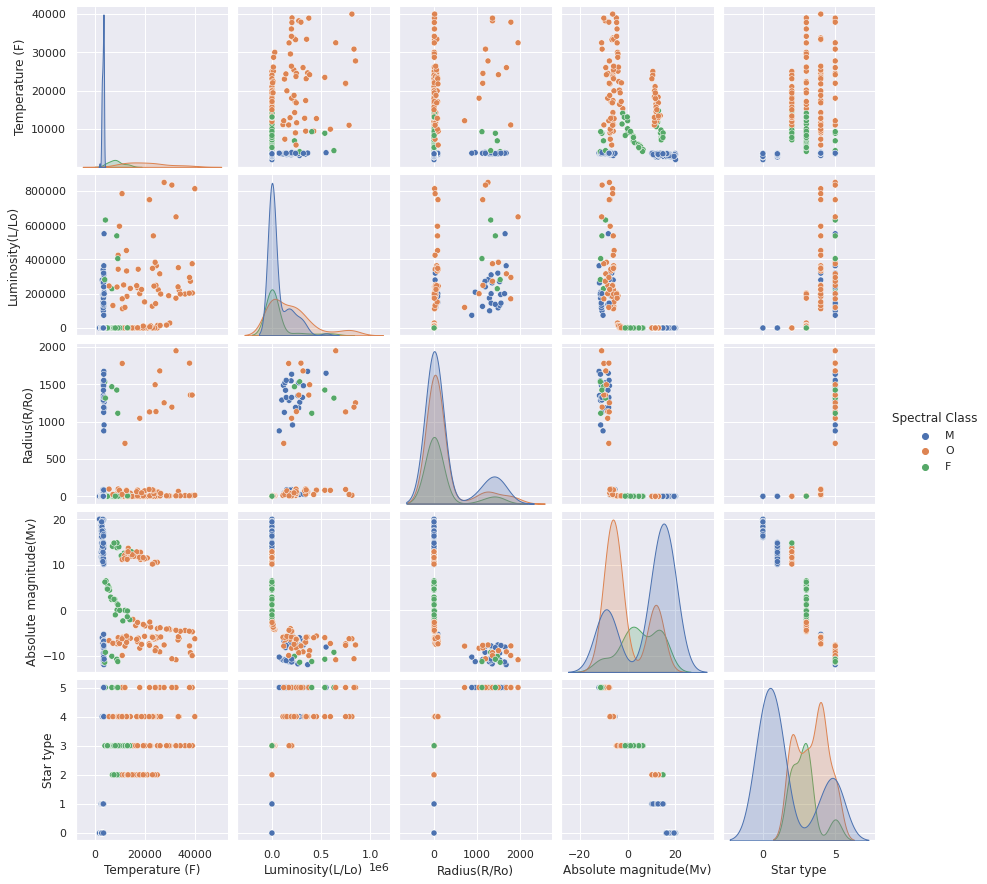

In [8]:
sns.pairplot(df, hue='Spectral Class')
plt.show()

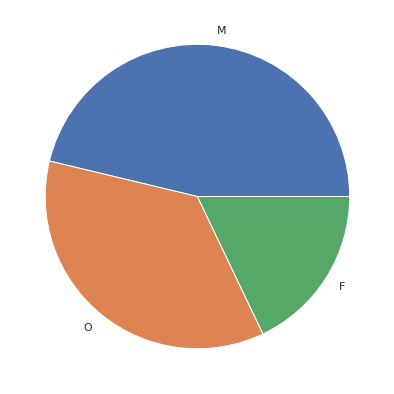

In [9]:
y = df['Spectral Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [10]:
X = df.drop(columns=['Spectral Class'])
X.head(15)

Temperature (F)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0              3068          0.002400        0.1700                  16.120   
1              3042          0.000500        0.1542                  16.600   
2              2600          0.000300        0.1020                  18.700   
3              2800          0.000200        0.1600                  16.650   
4              1939          0.000138        0.1030                  20.060   
5              2840          0.000650        0.1100                  16.980   
6              2637          0.000730        0.1270                  17.220   
7              2600          0.000400        0.0960                  17.400   
8              2650          0.000690        0.1100                  17.450   
9              2700          0.000180        0.1300                  16.050   
10             3600          0.002900        0.5100                  10.690   
11             3129          0.012200        0.3761                  11.790   
12             3134          0.000400        0.1960                  13.210   
13             3628          0.005500        0.3930                  10.480   
14             2650          0.000600        0.1400                  11.782   

    Star type  
0           0  
1           0  
2           0  
3           0  
4           0  
5           0  
6           0  
7           0  
8           0  
9           0  
10          1  
11          1  
12          1  
13          1  
14          1

In [11]:
X.describe().transpose()

count           mean            std         min  \
Temperature (F)         240.0   10497.462500    9552.425037  1939.00000   
Luminosity(L/Lo)        240.0  107188.361635  179432.244940     0.00008   
Radius(R/Ro)            240.0     237.157781     517.155763     0.00840   
Absolute magnitude(Mv)  240.0       4.382396      10.532512   -11.92000   
Star type               240.0       2.500000       1.711394     0.00000   

                                25%        50%          75%        max  
Temperature (F)         3344.250000  5776.0000   15055.5000   40000.00  
Luminosity(L/Lo)           0.000865     0.0705  198050.0000  849420.00  
Radius(R/Ro)               0.102750     0.7625      42.7500    1948.50  
Absolute magnitude(Mv)    -6.232500     8.3130      13.6975      20.06  
Star type                  1.000000     2.5000       4.0000       5.00

**Standardized Data**

In [12]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns

X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(15)

Temperature (F)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0         -0.779382         -0.598624     -0.459210                1.116745   
1         -0.782110         -0.598624     -0.459241                1.162414   
2         -0.828477         -0.598624     -0.459342                1.362213   
3         -0.807496         -0.598624     -0.459229                1.167171   
4         -0.897819         -0.598624     -0.459340                1.491607   
5         -0.803300         -0.598624     -0.459326                1.198568   
6         -0.824596         -0.598624     -0.459293                1.221402   
7         -0.828477         -0.598624     -0.459353                1.238528   
8         -0.823232         -0.598624     -0.459326                1.243285   
9         -0.817987         -0.598624     -0.459287                1.110085   
10        -0.723573         -0.598624     -0.458551                0.600121   
11        -0.772983         -0.598624     -0.458811                0.704778   
12        -0.772458         -0.598624     -0.459160                0.839881   
13        -0.720636         -0.598624     -0.458778                0.580141   
14        -0.823232         -0.598624     -0.459268                0.704017   

    Star type  
0    -1.46385  
1    -1.46385  
2    -1.46385  
3    -1.46385  
4    -1.46385  
5    -1.46385  
6    -1.46385  
7    -1.46385  
8    -1.46385  
9    -1.46385  
10   -0.87831  
11   -0.87831  
12   -0.87831  
13   -0.87831  
14   -0.87831

**Observations** **and** **Variables**

In [13]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

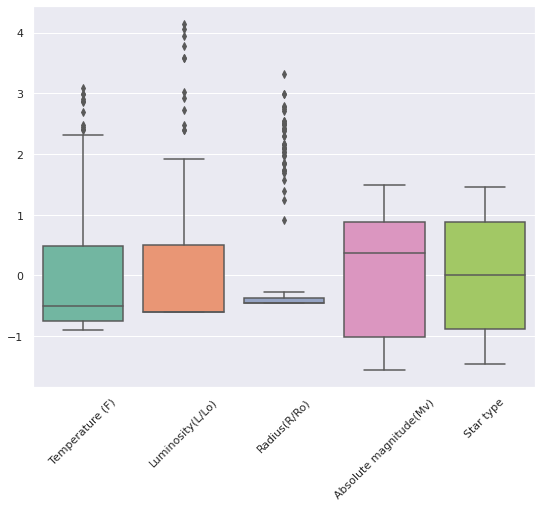

In [14]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

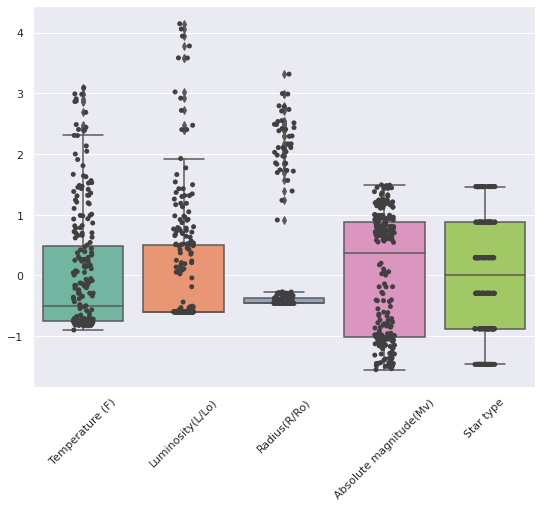

In [15]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

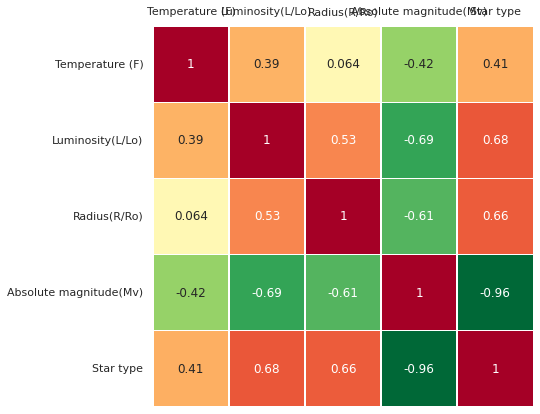

In [16]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);


#Principal Component Analysis (PCA)

In [17]:
pca = PCA(0.95)
Z = pca.fit_transform(X)

print("Shape of X:", X.shape)
print("Shape of Z:", Z.shape)

Shape of X: (240, 5)
Shape of Z: (240, 4)


In [18]:
pca.n_components_

4

In [19]:
print(Z)

[[-2.02930496e+00 -3.33009531e-01  4.34639641e-01  2.85390625e-01]
 [-2.05387018e+00 -3.34577147e-01  4.48037466e-01  3.03260842e-01]
 [-2.17103617e+00 -3.70345449e-01  5.11372592e-01  3.66168066e-01]
 [-2.06349915e+00 -3.55810480e-01  4.52874568e-01  2.93980104e-01]
 [-2.25796928e+00 -4.26531451e-01  5.57774855e-01  3.89490845e-01]
 [-2.07870714e+00 -3.51753212e-01  4.61260423e-01  3.08908165e-01]
 [-2.09658853e+00 -3.69286683e-01  4.70688261e-01  3.09022970e-01]
 [-2.10662601e+00 -3.72246863e-01  4.76109356e-01  3.14418954e-01]
 [-2.10761397e+00 -3.67787158e-01  4.76743580e-01  3.18759047e-01]
 [-2.03674984e+00 -3.65461523e-01  4.38043281e-01  2.65396846e-01]
 [-1.43723140e+00 -3.27319132e-01  8.30558416e-02 -8.11465339e-02]
 [-1.50576927e+00 -3.67022074e-01  1.19697565e-01 -5.95064561e-02]
 [-1.57612401e+00 -3.64310031e-01  1.58179865e-01 -3.01024487e-03]
 [-1.42608999e+00 -3.25040513e-01  7.69789964e-02 -8.83643629e-02]
 [-1.51972287e+00 -4.08948326e-01  1.26417883e-01 -8.24820743e

Text(0, 0.5, '$Z_2$')

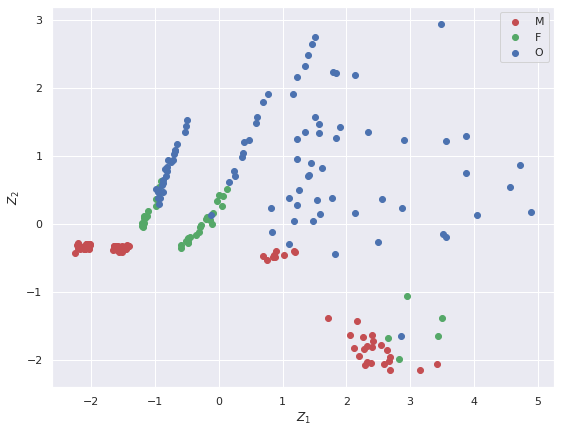

In [20]:
idx_M = np.where(y == 'M')
idx_F = np.where(y == 'F')
idx_O = np.where(y == 'O')

plt. figure()
plt.scatter(Z[idx_M, 0], Z[idx_M, 1], c='r', label='M')
plt.scatter(Z[idx_F, 0], Z[idx_F, 1], c='g', label='F')
plt.scatter(Z[idx_O, 0], Z[idx_O, 1], c='b', label='O')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigen Vectors**

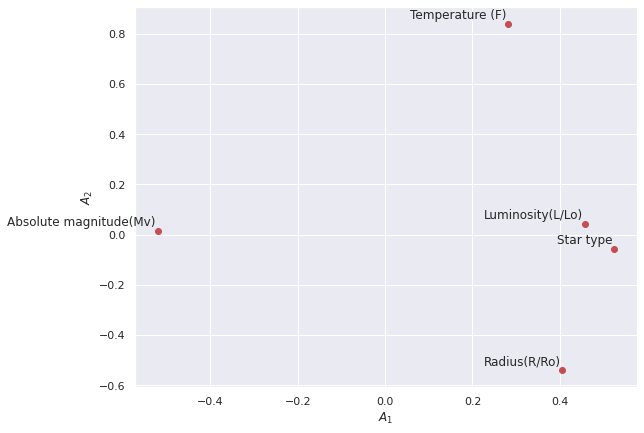

In [21]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


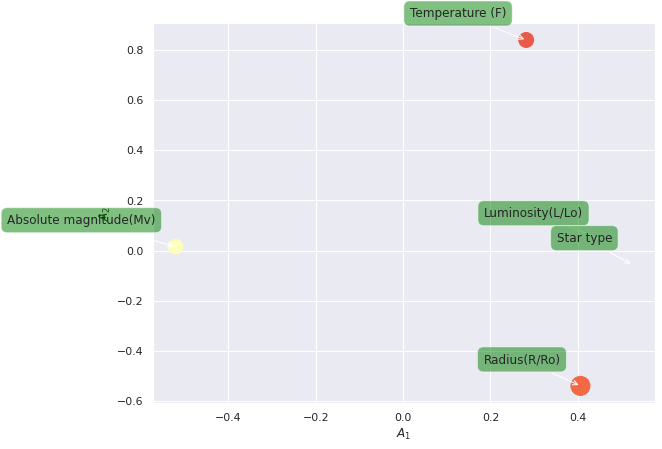

In [22]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='Green', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot**

Text(0, 0.5, 'Explained variance')

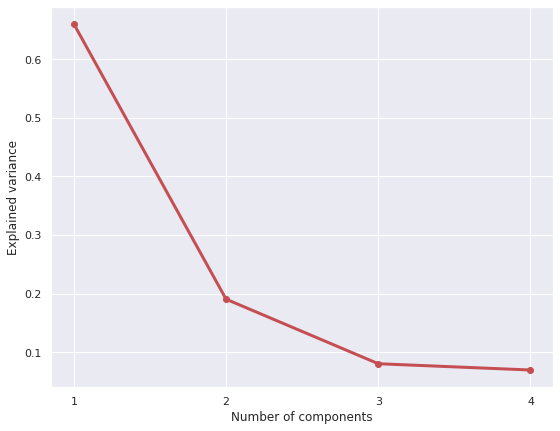

In [23]:
Lambda = pca.explained_variance_ 

x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Proportion of Variance Explained :  [0.65451512 0.18877324 0.07953216 0.06890269]
Explained Variances (Percentage):  [65.45151187 18.87732434  7.95321619  6.89026922]


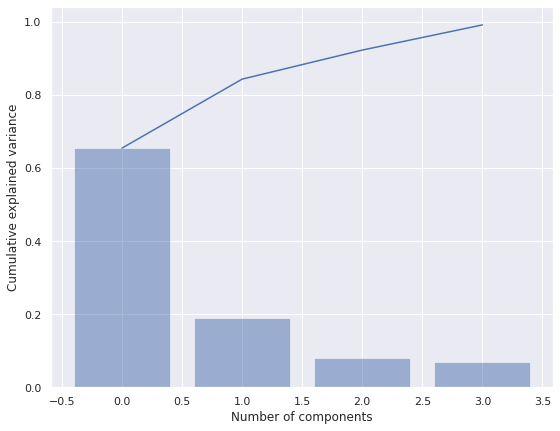

In [24]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)
print ("Explained Variances (Percentage): ", pca.explained_variance_ratio_ * 100)

**Biplot**

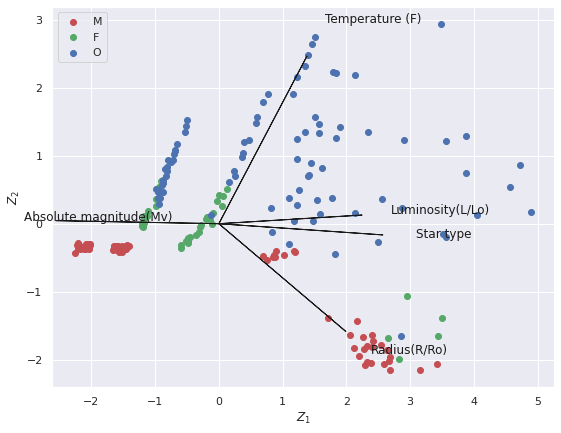

In [25]:
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_M,0], Z[idx_M,1], c='r', label='M')
plt.scatter(Z[idx_F,0], Z[idx_F,1], c='g', label='F')
plt.scatter(Z[idx_O,0], Z[idx_O,1], c='b', label='O')
plt.legend(loc='upper left')

#Using PCA Library

In [26]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=07be3487e21dbd3d0a8643d8e4b0fbb67eeb4f87e3c18f9377fbfd1b5d083861
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=0d94c8a05edf5dc868cebd5845289a72751d9e8cf2de318789b84cff374078f2
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


**Principal Components**

In [27]:
from pca import pca
model = pca()
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [28]:
out['PC']

PC1       PC2       PC3       PC4
0   -2.029305 -0.333010  0.434640  0.285391
1   -2.053870 -0.334577  0.448037  0.303261
2   -2.171036 -0.370345  0.511373  0.366168
3   -2.063499 -0.355810  0.452875  0.293980
4   -2.257969 -0.426531  0.557775  0.389491
..        ...       ...       ...       ...
235  3.882232  1.296230 -0.186838  1.744846
236  4.723864  0.862558  2.203037  0.858984
237  3.500028 -1.385927  1.012697  0.314552
238  2.953268 -1.058063  0.400602 -0.051426
239  3.877015  0.740745 -0.589723  2.425394

[240 rows x 4 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [240] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [240] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fabfe570520>)

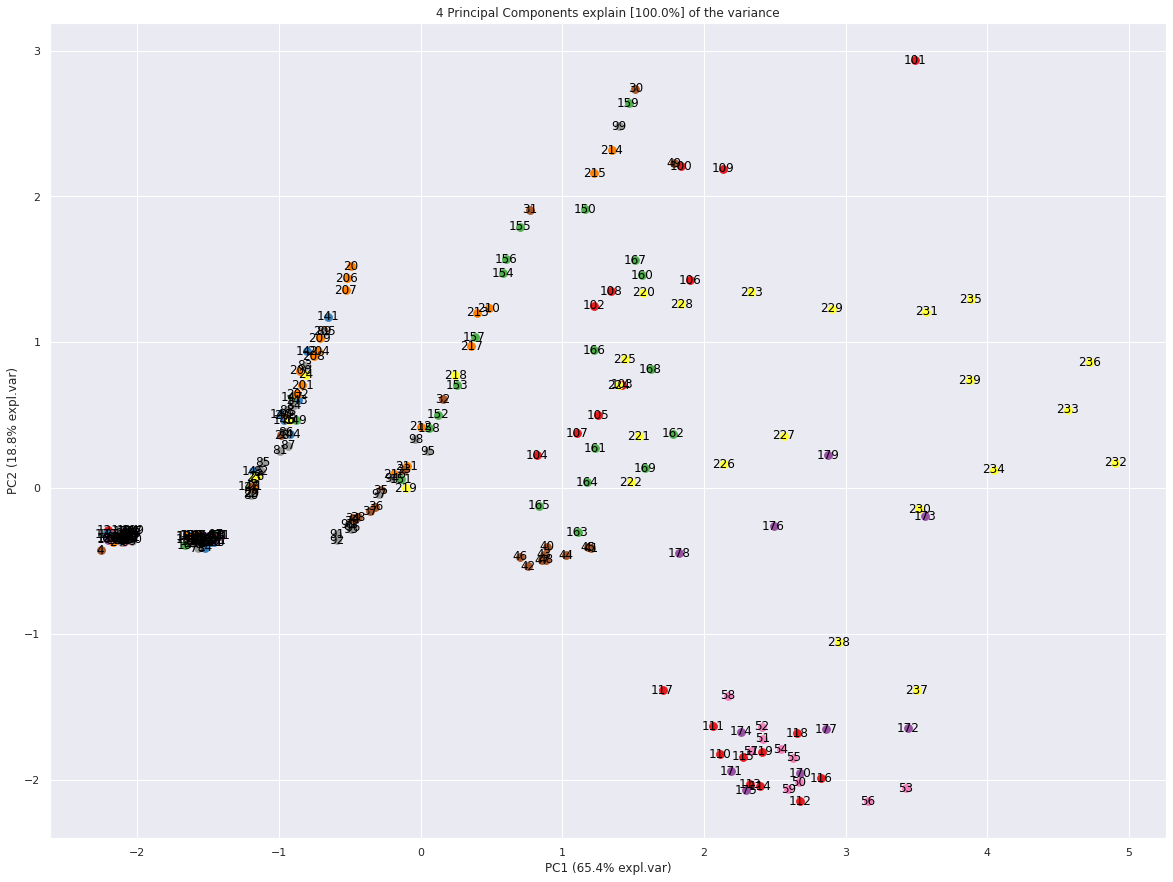

In [29]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [30]:
A = out['loadings'].T

sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='Yellow',alpha=0.5))

**Scree Plot**

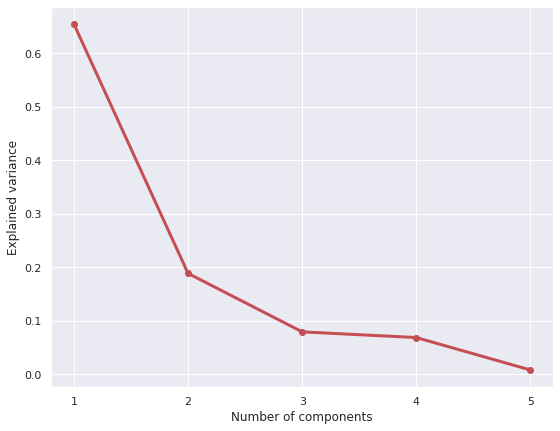

In [31]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

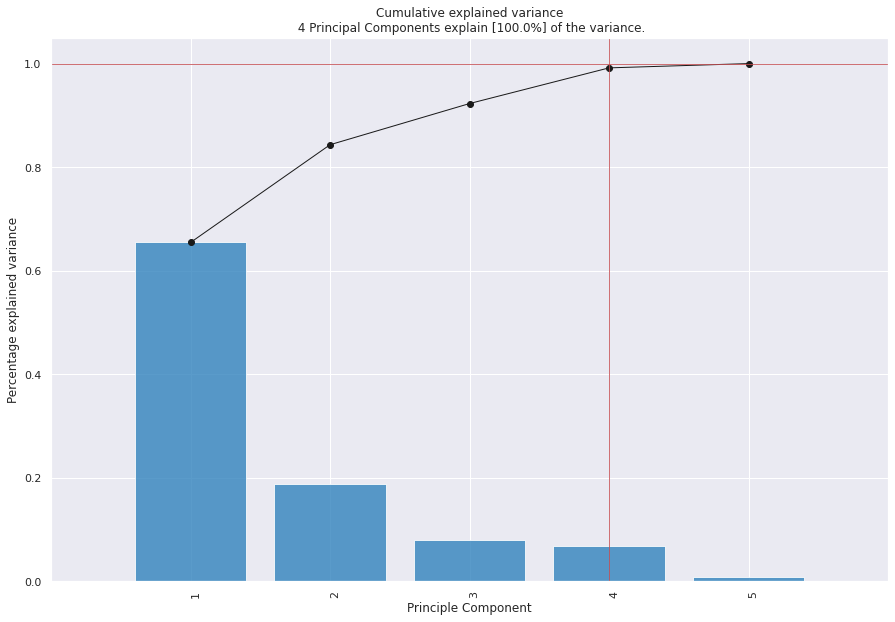

<Figure size 648x504 with 0 Axes>

In [32]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [240] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [240] unique colors! Available unique colors: [9].


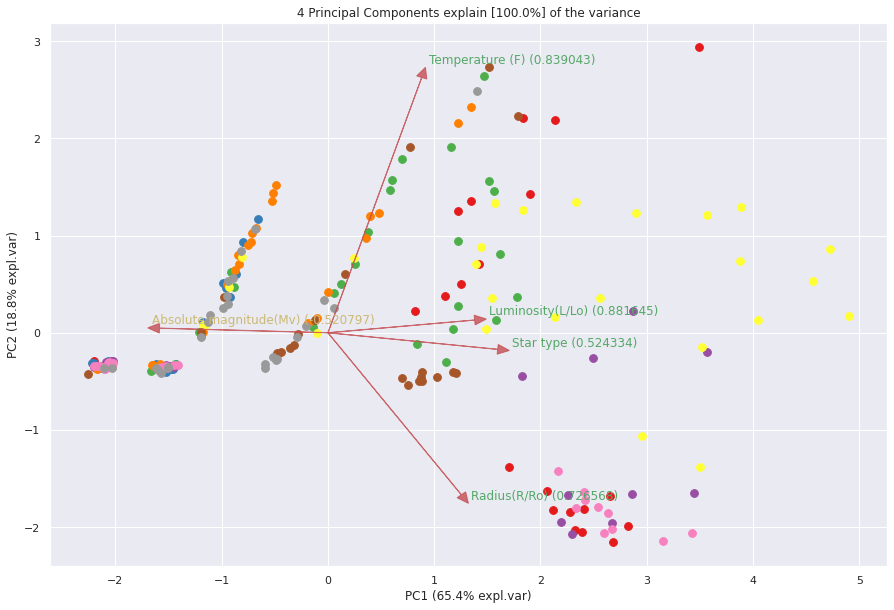

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fac00cadbe0>)

In [33]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [240] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [240] unique colors! Available unique colors: [9].


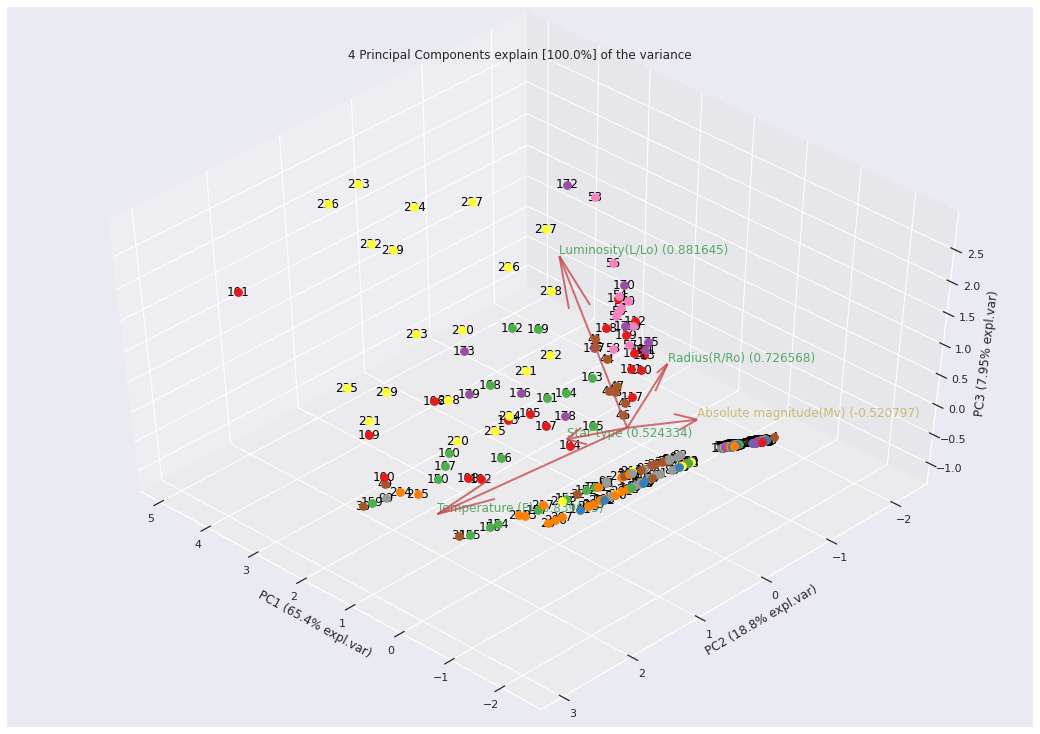

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fabfeee4fd0>)

In [34]:
model.biplot3d(legend=False)

#**Classification**

**Using pycaret**

In [35]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/AhtashamAkram/DataSet/main/Star_Data_3%20class_Updatedcsv.csv')
df.head(30)

Temperature (F)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0              3068          0.002400       0.17000                  16.120   
1              3042          0.000500       0.15420                  16.600   
2              2600          0.000300       0.10200                  18.700   
3              2800          0.000200       0.16000                  16.650   
4              1939          0.000138       0.10300                  20.060   
5              2840          0.000650       0.11000                  16.980   
6              2637          0.000730       0.12700                  17.220   
7              2600          0.000400       0.09600                  17.400   
8              2650          0.000690       0.11000                  17.450   
9              2700          0.000180       0.13000                  16.050   
10             3600          0.002900       0.51000                  10.690   
11             3129          0.012200       0.37610                  11.790   
12             3134          0.000400       0.19600                  13.210   
13             3628          0.005500       0.39300                  10.480   
14             2650          0.000600       0.14000                  11.782   
15             3340          0.003800       0.24000                  13.070   
16             2799          0.001800       0.16000                  14.790   
17             3692          0.003670       0.47000                  10.800   
18             3192          0.003620       0.19670                  13.530   
19             3441          0.039000       0.35100                  11.180   
20            25000          0.056000       0.00840                  10.580   
21             7740          0.000490       0.01234                  14.020   
22             7220          0.000170       0.01100                  14.230   
23             8500          0.000500       0.01000                  14.500   
24            16500          0.013000       0.01400                  11.890   
25            12990          0.000085       0.00984                  12.230   
26             8570          0.000810       0.00970                  14.200   
27             7700          0.000110       0.01280                  14.470   
28            11790          0.000150       0.01100                  12.590   
29             7230          0.000080       0.01300                  14.080   

    Star type Spectral Class  
0           0              M  
1           0              M  
2           0              M  
3           0              M  
4           0              M  
5           0              M  
6           0              M  
7           0              M  
8           0              M  
9           0              M  
10          1              M  
11          1              M  
12          1              M  
13          1              M  
14          1              M  
15          1              M  
16          1              M  
17          1              M  
18          1              M  
19          1              M  
20          2              O  
21          2              F  
22          2              F  
23          2              F  
24          2              O  
25          2              F  
26          2              F  
27          2              F  
28          2              F  
29          2              F

In [37]:
df["Spectral Class"].unique()
print(df.count())

Temperature (F)           240
Luminosity(L/Lo)          240
Radius(R/Ro)              240
Absolute magnitude(Mv)    240
Star type                 240
Spectral Class            240
dtype: int64


In [38]:
data = df.sample(frac=0.9, random_state=786)
print(data.count())
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Temperature (F)           216
Luminosity(L/Lo)          216
Radius(R/Ro)              216
Absolute magnitude(Mv)    216
Star type                 216
Spectral Class            216
dtype: int64
Data for Modeling: (216, 6)
Unseen Data For Predictions: (24, 6)


In [39]:
data_unseen

Temperature (F)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0              2840          0.000650       0.11000                   16.98   
1             25000          0.056000       0.00840                   10.58   
2              8500          0.000500       0.01000                   14.50   
3             39000     204000.000000      10.60000                   -4.70   
4              3834     272000.000000    1183.00000                   -9.20   
5              2935          0.000140       0.11600                   18.89   
6             10574          0.000140       0.00920                   12.02   
7             10980          0.000740       0.00870                   11.19   
8             17120     235000.000000      83.00000                   -6.89   
9             12893     184000.000000      36.00000                   -6.34   
10             3511          0.000640       0.10900                   17.12   
11             3100          0.008000       0.31000                   11.17   
12             3324          0.003400       0.34000                   12.23   
13            12912          0.000710       0.00945                   12.83   
14            29560     188000.000000       6.02000                   -4.01   
15            18000     200000.000000    1045.00000                   -8.30   
16             3484          0.000551       0.09980                   16.67   
17             3523          0.000957       0.12900                   16.35   
18             3523          0.005400       0.31900                   12.43   
19            14982          0.001180       0.01130                   12.23   
20            32460     173800.000000       6.23700                   -4.36   
21            24145     382993.000000    1494.00000                   -8.84   
22            21904     748490.000000    1130.00000                   -7.67   
23            37882     294903.000000    1783.00000                   -7.80   

    Star type Spectral Class  
0           0              M  
1           2              O  
2           2              F  
3           3              O  
4           5              M  
5           0              M  
6           2              F  
7           2              O  
8           4              O  
9           4              O  
10          0              M  
11          1              M  
12          1              M  
13          2              O  
14          3              O  
15          5              O  
16          0              M  
17          0              M  
18          1              M  
19          2              O  
20          3              O  
21          5              O  
22          5              O  
23          5              O

In [40]:
print(data_unseen.count())

Temperature (F)           24
Luminosity(L/Lo)          24
Radius(R/Ro)              24
Absolute magnitude(Mv)    24
Star type                 24
Spectral Class            24
dtype: int64


In [41]:
print(data.index)

RangeIndex(start=0, stop=216, step=1)


**Setting up the Environment in PyCaret**

In [42]:

from pycaret.classification import *
clf = setup(data=data, target='Spectral Class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target    Spectral Class
2                              Target Type        Multiclass
3                            Label Encoded  F: 0, M: 1, O: 2
4                            Original Data          (216, 6)
5                           Missing Values             False
6                         Numeric Features                 4
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (151, 10)
12                    Transformed Test Set          (65, 10)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              a1f3
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Spectral Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeri...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', '

**Comparing All Models**

In [43]:

best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9733  0.9949  0.9589  0.9796   
gbc          Gradient Boosting Classifier    0.9667  0.9988  0.9533  0.9586   
dt               Decision Tree Classifier    0.9600  0.9726  0.9411  0.9665   
rf               Random Forest Classifier    0.9600  0.9950  0.9311  0.9651   
et                 Extra Trees Classifier    0.9600  0.9963  0.9411  0.9681   
ridge                    Ridge Classifier    0.9333  0.0000  0.9075  0.9433   
lda          Linear Discriminant Analysis    0.9267  0.9912  0.9177  0.9379   
nb                            Naive Bayes    0.9138  0.9865  0.9106  0.9469   
ada                  Ada Boost Classifier    0.9013  0.9881  0.8922  0.9413   
knn                K Neighbors Classifier    0.8404  0.9526  0.8121  0.8500   
lr                    Logistic Regression    0.8146  0.9511  0.6996  0.7841   
dummy                    Dummy Classifier    0.5033  0.5000  0.3333  0.2543   
svm                   SVM - Linear Kernel    0.3575  0.0000  0.3706  0.1623   
qda       Quadratic Discriminant Analysis    0.1525  0.0000  0.3333  0.0242   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.9726  0.9555  0.9583     0.122  
gbc       0.9596  0.9447  0.9513     0.218  
dt        0.9594  0.9346  0.9373     0.016  
rf        0.9586  0.9332  0.9360     0.201  
et        0.9588  0.9332  0.9374     0.164  
ridge     0.9320  0.8888  0.8949     0.016  
lda       0.9265  0.8797  0.8859     0.016  
nb        0.9161  0.8702  0.8793     0.015  
ada       0.9023  0.8408  0.8561     0.091  
knn       0.8371  0.7284  0.7372     0.023  
lr        0.7845  0.6850  0.7059     0.431  
dummy     0.3376  0.0000  0.0000     0.015  
svm       0.2130  0.0263  0.0404     0.015  
qda       0.0416  0.0000  0.0000     0.020

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [44]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

Decision Tree Classifier ('dt')

K Neighbors Classifier ('knn')

Logistic Regression ('lr')

**Create Decision Tree Classifier**

In [45]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9333  0.9444  0.8333  0.9429  0.9248  0.8864  0.8938
2       0.8667  0.9083  0.8222  0.8667  0.8667  0.7887  0.7887
3       0.9333  0.9500  0.8889  0.9444  0.9297  0.8929  0.8995
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9333  0.9615  0.9333  0.9556  0.9363  0.8889  0.8956
8       0.9333  0.9615  0.9333  0.9556  0.9363  0.8889  0.8956
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9600  0.9726  0.9411  0.9665  0.9594  0.9346  0.9373
SD      0.0442  0.0307  0.0678  0.0411  0.0447  0.0714  0.0697

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [46]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model: **

How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [47]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.8667  0.9256  0.7778  0.8667  0.8667  0.7794  0.7794
2       0.8667  0.9022  0.8222  0.8667  0.8667  0.7887  0.7887
3       0.9333  0.9500  0.8889  0.9444  0.9297  0.8929  0.8995
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9333  0.9615  0.9333  0.9556  0.9363  0.8889  0.8956
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9600  0.9739  0.9422  0.9633  0.9599  0.9350  0.9363
SD      0.0533  0.0350  0.0802  0.0521  0.0534  0.0865  0.0859

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [48]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [49]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Model Performance analysis using different plots**

In [50]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**K Neighbors Model**

In [51]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  0.9915  0.9444  0.9583  0.9409  0.8974  0.9034
1       0.6667  0.9338  0.6270  0.6841  0.6718  0.4526  0.4559
2       0.7333  0.8736  0.7079  0.7333  0.7333  0.5775  0.5775
3       0.9333  0.9778  0.8889  0.9444  0.9297  0.8929  0.8995
4       0.9333  0.9850  0.9524  0.9444  0.9338  0.8958  0.9021
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8000  0.9400  0.8500  0.8127  0.8024  0.6667  0.6717
7       0.9333  0.9352  0.9583  0.9444  0.9341  0.8889  0.8956
8       0.7333  0.9307  0.5333  0.7212  0.6991  0.5000  0.5386
9       0.7333  0.9581  0.6583  0.7567  0.7259  0.5122  0.5276
Mean    0.8404  0.9526  0.8121  0.8500  0.8371  0.7284  0.7372
SD      0.1127  0.0361  0.1574  0.1135  0.1163  0.1962  0.1917

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [52]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  1.0000  0.9444  0.9583  0.9409  0.8974  0.9034
1       0.8000  0.9847  0.8333  0.8750  0.7911  0.6853  0.7206
2       0.7333  0.8650  0.6889  0.7185  0.7083  0.5652  0.5831
3       0.8000  0.9283  0.7556  0.8130  0.7906  0.6691  0.6858
4       0.9333  0.9500  0.9524  0.9444  0.9338  0.8958  0.9021
5       0.8667  0.9838  0.8667  0.8933  0.8574  0.7619  0.7895
6       0.9333  0.9171  0.9333  0.9407  0.9316  0.8837  0.8911
7       0.9333  0.9500  0.9583  0.9444  0.9341  0.8889  0.8956
8       0.9333  0.9436  0.9333  0.9556  0.9363  0.8889  0.8956
9       0.7333  0.8733  0.7333  0.8101  0.6669  0.5238  0.5925
Mean    0.8604  0.9396  0.8600  0.8853  0.8491  0.7660  0.7859
SD      0.0818  0.0430  0.0965  0.0770  0.0985  0.1390  0.1246

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**K Neighbors Model evaluation**

In [53]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Logistic Regression Model**

In [54]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8125  0.9511  0.6250  0.7188  0.7589  0.6667  0.6882
1       0.8000  0.9447  0.6111  0.7524  0.7744  0.6591  0.6646
2       0.7333  0.7744  0.6444  0.7130  0.7106  0.5588  0.5727
3       0.8000  0.9361  0.7111  0.8306  0.7780  0.6691  0.6858
4       0.6667  0.9711  0.5714  0.5741  0.5971  0.4565  0.5087
5       0.9333  0.9949  0.8333  0.9407  0.9242  0.8810  0.8894
6       0.8000  1.0000  0.6250  0.7417  0.7542  0.6512  0.6908
7       0.8667  0.9815  0.7917  0.9048  0.8644  0.7727  0.7909
8       1.0000  0.9949  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.7333  0.9619  0.5833  0.6655  0.6831  0.5349  0.5675
Mean    0.8146  0.9511  0.6996  0.7841  0.7845  0.6850  0.7059
SD      0.0932  0.0626  0.1299  0.1258  0.1118  0.1544  0.1435

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Logistic Regression Model Tuning**

In [55]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7500  0.9493  0.6806  0.7917  0.7667  0.5949  0.5990
1       0.7333  0.9396  0.5556  0.7333  0.7333  0.5588  0.5588
2       0.8000  0.7661  0.7556  0.8296  0.7917  0.6739  0.6953
3       0.8667  0.9822  0.8222  0.8667  0.8667  0.7887  0.7887
4       0.7333  0.9456  0.6825  0.8519  0.7270  0.5775  0.6335
5       0.9333  0.9831  0.9333  0.9556  0.9363  0.8889  0.8956
6       0.8000  0.9631  0.6250  0.7417  0.7542  0.6512  0.6908
7       0.8000  0.9815  0.7250  0.8222  0.8069  0.6667  0.6717
8       0.8667  0.9764  0.8917  0.8889  0.8711  0.7826  0.7888
9       0.8667  0.9486  0.9167  0.9048  0.8683  0.7826  0.8061
Mean    0.8150  0.9435  0.7588  0.8386  0.8122  0.6966  0.7128
SD      0.0634  0.0613  0.1222  0.0668  0.0666  0.1036  0.0995

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Logistic Regression Model evaluation**

In [56]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [57]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9333  0.9875  0.8333  0.9429  0.9248  0.8864  0.8938
2       0.9333  0.9944  0.8889  0.9417  0.9289  0.8913  0.8984
3       0.9333  1.0000  0.8889  0.9444  0.9297  0.8929  0.8995
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8667  0.9882  0.7667  0.8667  0.8667  0.7727  0.7727
8       0.9333  0.9797  0.9333  0.9556  0.9363  0.8889  0.8956
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9600  0.9950  0.9311  0.9651  0.9586  0.9332  0.9360
SD      0.0442  0.0070  0.0799  0.0416  0.0451  0.0746  0.0730

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Random Forest Model evaluation**

In [58]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  0.9893  0.9444  0.9583  0.9409  0.8974  0.9034
1       0.8667  0.9875  0.7778  0.8667  0.8667  0.7794  0.7794
2       0.9333  0.9878  0.8889  0.9444  0.9297  0.8929  0.8995
3       0.9333  1.0000  0.8889  0.9444  0.9297  0.8929  0.8995
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8667  0.9882  0.7667  0.8667  0.8667  0.7727  0.7727
8       0.9333  0.9882  0.9333  0.9556  0.9363  0.8889  0.8956
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9471  0.9941  0.9200  0.9536  0.9470  0.9124  0.9150
SD      0.0498  0.0059  0.0849  0.0489  0.0499  0.0833  0.0828

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [59]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#Best Model

In [60]:
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  1.0000  0.8333  0.9464  0.9295  0.8919  0.8985
1       0.9333  1.0000  0.8333  0.9429  0.9248  0.8864  0.8938
2       0.9333  0.9833  0.8889  0.9417  0.9289  0.8913  0.8984
3       0.9333  0.9700  0.8889  0.9444  0.9297  0.8929  0.8995
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9333  1.0000  0.9333  0.9556  0.9363  0.8889  0.8956
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8667  0.9823  0.7667  0.8667  0.8667  0.7727  0.7727
8       0.9333  0.9882  0.9333  0.9556  0.9363  0.8889  0.8956
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9471  0.9924  0.9078  0.9553  0.9452  0.9113  0.9154
SD      0.0399  0.0102  0.0765  0.0379  0.0406  0.0675  0.0663

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [61]:
tuned_best_model

LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

**Best Model evaluation**

In [62]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#Classification + PCA

In [63]:
clf_pca = setup(data=data, target='Spectral Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target    Spectral Class
2                              Target Type        Multiclass
3                            Label Encoded  F: 0, M: 1, O: 2
4                            Original Data          (216, 6)
5                           Missing Values             False
6                         Numeric Features                 4
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (151, 3)
12                    Transformed Test Set           (65, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              7065
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Spectral Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeri...
                ('dummy', Dummify(target='Spectral Class')),
                ('fix_perfect', Remove_100(target='Spectral Class')),
    

In [64]:
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.9400  0.9726  0.9211  0.9485   
rf               Random Forest Classifier    0.9400  0.9869  0.9111  0.9498   
lightgbm  Light Gradient Boosting Machine    0.9400  0.9749  0.9011  0.9476   
et                 Extra Trees Classifier    0.9333  0.9899  0.9044  0.9421   
gbc          Gradient Boosting Classifier    0.9267  0.9692  0.8803  0.9288   
qda       Quadratic Discriminant Analysis    0.9138  0.9857  0.9191  0.9368   
dt               Decision Tree Classifier    0.9133  0.9311  0.8669  0.9146   
lr                    Logistic Regression    0.8942  0.9775  0.8333  0.9076   
nb                            Naive Bayes    0.8942  0.9674  0.9002  0.9217   
svm                   SVM - Linear Kernel    0.8875  0.0000  0.7844  0.8739   
ada                  Ada Boost Classifier    0.8542  0.9287  0.8292  0.8940   
lda          Linear Discriminant Analysis    0.8475  0.9757  0.7367  0.8431   
ridge                    Ridge Classifier    0.8208  0.0000  0.6400  0.7054   
dummy                    Dummy Classifier    0.5033  0.5000  0.3333  0.2543   

              F1   Kappa     MCC  TT (Sec)  
knn       0.9392  0.8985  0.9040     0.021  
rf        0.9371  0.8993  0.9057     0.200  
lightgbm  0.9368  0.8988  0.9044     0.116  
et        0.9312  0.8882  0.8939     0.160  
gbc       0.9208  0.8744  0.8806     0.213  
qda       0.9154  0.8614  0.8716     0.015  
dt        0.9085  0.8526  0.8585     0.014  
lr        0.8898  0.8236  0.8316     0.324  
nb        0.8961  0.8274  0.8382     0.015  
svm       0.8682  0.8074  0.8205     0.016  
ada       0.8515  0.7651  0.7815     0.095  
lda       0.8328  0.7355  0.7510     0.015  
ridge     0.7547  0.6776  0.7131     0.013  
dummy     0.3376  0.0000  0.0000     0.015

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


In [65]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Best Model Tuning**

In [66]:
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9333  0.9926  0.9444  0.9556  0.9370  0.8929  0.8995
2       0.8000  0.9272  0.7556  0.8296  0.7917  0.6739  0.6953
3       0.9333  1.0000  0.8889  0.9444  0.9297  0.8929  0.8995
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  0.9949  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8667  0.9897  0.7667  0.8741  0.8649  0.7674  0.7738
9       0.9333  0.9933  0.9333  0.9407  0.9316  0.8837  0.8911
Mean    0.9467  0.9898  0.9289  0.9544  0.9455  0.9111  0.9159
SD      0.0653  0.0212  0.0914  0.0572  0.0675  0.1085  0.1027

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=42, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


**Best Model evaluation**

In [67]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=42, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#Explainable AI with Shapley values

In [69]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
import shap

In [71]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9333  0.9749  0.8333  0.9429  0.9248  0.8864  0.8938
2       0.8000  0.9517  0.7556  0.8296  0.7917  0.6739  0.6953
3       0.9333  0.9878  0.8889  0.9444  0.9297  0.8929  0.8995
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9333  1.0000  0.9333  0.9407  0.9316  0.8837  0.8911
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9333  0.9882  0.8333  0.9444  0.9253  0.8837  0.8911
8       0.9333  0.9831  0.9333  0.9556  0.9363  0.8889  0.8956
9       0.9333  0.9838  0.9333  0.9407  0.9316  0.8837  0.8911
Mean    0.9400  0.9869  0.9111  0.9498  0.9371  0.8993  0.9057
SD      0.0554  0.0145  0.0787  0.0472  0.0578  0.0907  0.0848

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [72]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9375  1.0000  0.9444  0.9583  0.9409  0.8974  0.9034
1       0.8667  0.9749  0.7778  0.8667  0.8667  0.7794  0.7794
2       0.8000  0.9317  0.7556  0.8296  0.7917  0.6739  0.6953
3       0.9333  0.9878  0.8889  0.9444  0.9297  0.8929  0.8995
4       0.9333  1.0000  0.9524  0.9444  0.9338  0.8958  0.9021
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9333  0.9764  0.9333  0.9556  0.9363  0.8889  0.8956
9       0.8667  0.9610  0.8917  0.8667  0.8667  0.7727  0.7727
Mean    0.9271  0.9832  0.9144  0.9366  0.9266  0.8801  0.8848
SD      0.0629  0.0217  0.0835  0.0585  0.0647  0.1040  0.1002

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


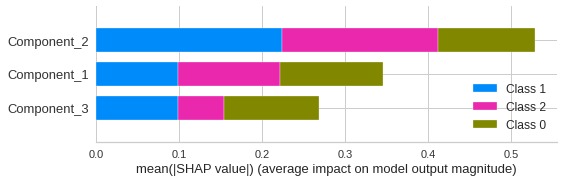

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [73]:
interpret_model(tuned_rf_pca, plot='summary')

In [74]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [75]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


**Visualize many predictions**

In [76]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
